<center><img src="images/header1.png" width=400></center>
<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Анализ графов и социальных сетей</center></h2>
<h3><center>Шестаков Андрей</center></h3>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

In [3]:
import networkx as nx

In [ ]:
# Uncomment if you are using colab
# !mkdir ./data
# !mkdir ./data/1504653

# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/chapters.csv -O ./data/chapters.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/characters.csv -O ./data/characters.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/events.csv -O ./data/events.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/teams.csv -O ./data/teams.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/nested_partition.gml -O ./data/nested_partition.gml
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/Princeton.gml -O ./data/Princeton.gml
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/network.gml -O ./data/network.gml
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/1504653/friends_1504653.json -O ./data/1504653/friends_1504653.json
# !wget https://raw.githubusercontent.com/vadim0912/MLIntro2022_Spring/blob/master/lecture11/data/1504653/common_friends_1504653.json -O ./data/1504653/common_friends_1504653.json

# Создадим граф в [networkX](https://networkx.github.io/documentation/stable/)

In [ ]:
g = nx.Graph()

In [ ]:
g

In [ ]:
# Как корабль назовешь..
g.graph['some title'] = 'first graph'

In [ ]:
g.graph

## Добавим вершины

In [ ]:
g.add_node(1)

In [ ]:
g.number_of_nodes()

In [ ]:
g.add_node('some_node') # можно создавать вершины с произвольным идентификатором

## Добавим ребра

In [ ]:
g.add_edge(0, 1) # если вершины с идентификатором х еще не было, то она автоматически сгенерируется

In [ ]:
g.edges()

In [ ]:
g.nodes()

In [ ]:
g.add_edges_from([(0,2), 
                  (1,3), 
                  (4,3), 
                  (1,2), 
                  (2,2), 
                  (3,2)])

In [ ]:
g.edges()

## Различные операции с вершинами и ребрами

In [ ]:
g.degree() # Степени вершин (количество связей для каждой вершины)

In [ ]:
g.degree['some_node']

Вершинам можно задавать различные атрибуты (читай "признаки")

In [ ]:
for n_id in g.nodes():
    g.nodes[n_id]['label'] = 'v_{}'.format(n_id)

In [ ]:
nx.get_node_attributes(g, 'label')

In [ ]:
g.nodes[1]

In [ ]:
g.nodes.data()

Иногда это удобнее делать так:

In [ ]:
some_attributes = {0: 'val1', 1: 'val2'}
nx.set_node_attributes(g, some_attributes, 'attr')

In [ ]:
g.nodes.data()

Тоже самое для ребер

In [ ]:
g.edges[1,0]['type'] = 'friendship'

In [ ]:
g.edges[1,0]

In [ ]:
# проверка различных свойств графа
g.is_directed() 

In [ ]:
nx.is_connected(g)

## Объединение графов

In [ ]:
g1 = g.copy()
g2 = nx.erdos_renyi_graph(10, 0.3)

In [ ]:
# g3 = nx.disjoint_union(g1, g2)
g3 = nx.union(g1, g2, rename=('g1_', 'g2_'))

In [ ]:
print(g1.number_of_nodes())
print(g2.number_of_nodes())
print(g3.number_of_nodes())

In [ ]:
g1.nodes()

In [ ]:
g3.nodes()

Создадите граф с рисунка

<img src='./images/clique_init.png' width="550"/>

In [ ]:
# Your Code Here

In [ ]:
nx.draw_spring(g)

Выведем матрицу смежности, список смежности и список ребер этого графа

In [ ]:
A = nx.adj_matrix(g)
A

In [ ]:
A.todense()

In [ ]:
nx.adjacency_data(g)

Сохраним что-нибудь из этого:

In [ ]:
nx.write_edgelist(g, 'graph.edglist')
nx.write_graphml(g, 'graph.gml')

In [ ]:
!head graph.gml # на Windows не сработает

In [ ]:
!head graph.edglist # на Windows не сработает

# (ваши) Соц-графы

* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI

In [7]:
import json
import os

VKID = '317674518'

DATA_FOLDER = os.path.join('.', 'data')
VK_DATA_FOLDER = os.path.join(DATA_FOLDER, VKID)

In [8]:
VK_DATA_FOLDER

'./data/317674518'

In [9]:

filepath = os.path.join(VK_DATA_FOLDER, 'friends_{}.json'.format(VKID))

with open(filepath, 'r') as fin:
    friends_temp = json.load(fin)[0]

In [10]:
# Словарь с вашими друзьями
friends_temp

{'397219': {'id': 397219,
  'first_name': 'Alexey',
  'last_name': 'Shakurov',
  'can_access_closed': True,
  'is_closed': False,
  'sex': 2,
  'bdate': '12.4.1987',
  'city': {'id': 1, 'title': 'Moscow'},
  'track_code': 'eb5ec3d4JIve71K0fiyAfzqqpd56aYCcAyZOeu5oUTsLEeiVnCJJ4IPXZb8lLtAtAxZja7QG94hxTw'},
 '2101914': {'id': 2101914,
  'first_name': 'Nikolay',
  'last_name': 'Martynov',
  'can_access_closed': True,
  'is_closed': False,
  'sex': 2,
  'bdate': '7.3',
  'city': {'id': 1, 'title': 'Moscow'},
  'track_code': '8d747e80UXLrqvin1FbXQqUw5X2SoyaNQE_wstq3NAY9rP4jBw88GbOfm6DXX4Qalb5IxE_VX45AJpU'},
 '4732102': {'id': 4732102,
  'first_name': 'Artyom',
  'last_name': 'Borisenko',
  'can_access_closed': True,
  'is_closed': False,
  'sex': 2,
  'bdate': '2.8.1991',
  'city': {'id': 20680, 'title': 'Zvezdny Gorodok'},
  'track_code': '4369ef18EEx_kbWCP1auB7KQK7gmXVvnoaptlHCbpKz4ENmSHEN9JyOn09A8V_0OgBiGAfsrIuShwwg'},
 '10106209': {'id': 10106209,
  'first_name': 'Alexander',
  'last_name

In [11]:
# Просто меняем строковый ключ на числовой
friends = dict()
for k in friends_temp.keys():
    friends[int(k)] = friends_temp[k]

In [12]:
filepath = os.path.join(VK_DATA_FOLDER, 'common_friends_{}.json'.format(VKID))

with open(filepath, 'r') as fin:
    common_friends_temp = json.load(fin)

In [13]:
# Словарь с общими друзьями между вами и вашими друзьями
common_friends_temp

{'397219': [2101914,
  4732102,
  22720249,
  30878462,
  42089630,
  49118976,
  52795085,
  58261993,
  65552805,
  105843974,
  107012941,
  135883018,
  137524812,
  162154597,
  234628752,
  270343734,
  530918279],
 '2101914': [397219,
  12608978,
  12980077,
  22720249,
  26372920,
  42089630,
  49118976,
  51693292,
  52795085,
  69846342,
  79400760,
  89075283,
  132948246,
  134142687,
  137524812,
  185134165,
  209882930,
  216174660,
  222702846,
  357178840],
 '4732102': [397219,
  22720249,
  42089630,
  49118976,
  50752810,
  65552805,
  105843974,
  137524812,
  153755962,
  162154597,
  209882930,
  222702846,
  234628752],
 '10106209': [12980077, 21164327, 55786070, 66992343, 325745051],
 '11203942': [21164327,
  25605760,
  25637116,
  58261523,
  58261993,
  62118936,
  65256295,
  66142595,
  101897697,
  105843974,
  107012941,
  111588514,
  132948246,
  162154597,
  209882930,
  216843111],
 '12980077': [2101914,
  10106209,
  15623958,
  25085082,
  25605760

In [14]:
# Просто меняем строковый ключ на числовой
common_friends = dict()
for k in common_friends_temp.keys():
    common_friends[int(k)] = common_friends_temp[k]

In [15]:
g = nx.Graph()

In [16]:
# Делаем список из пар (vkid, словарь с характеристиками)

g.add_nodes_from((fid, {'sex': friend.get('sex', '-1'), 
                        'first_name': friend.get('first_name', '-1'), 
                        'last_name': friend.get('last_name', '-1'), 
                        'university_name': friend.get('university_name', '-1')}) for fid, friend in friends.items())

In [17]:
g.number_of_nodes()

119

In [18]:
# Делаем список из пар (vkid1, vkid2)
g.add_edges_from((f1, f2) for f1, f_list in common_friends.items() for f2 in f_list)

In [19]:
g.number_of_edges()

997

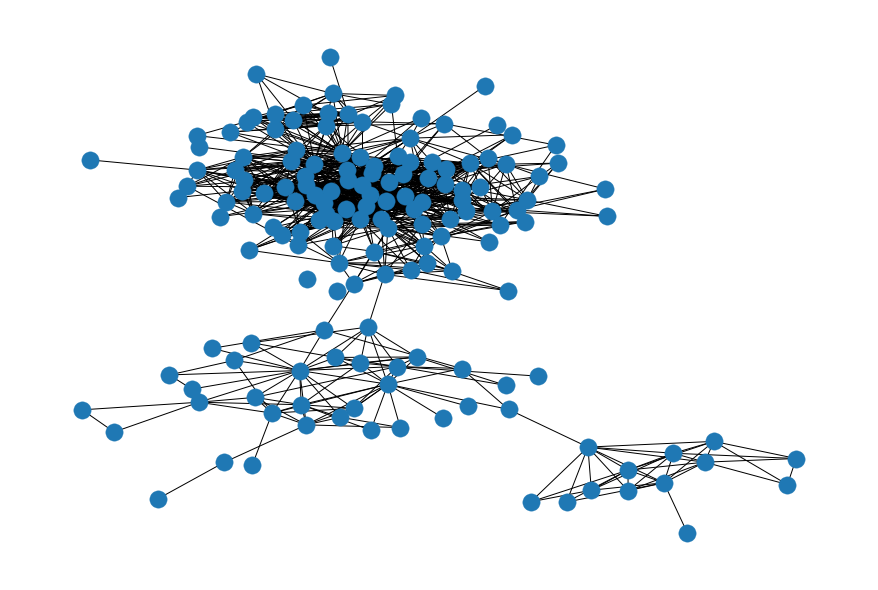

In [20]:
nx.draw_kamada_kawai(g)

In [21]:
nx.write_graphml(g, 'vk_graph.graphml')

Попробуем открыть это дело в gephi!

##  Поиск и вывод наиболее значимых вершин в вашей сети

In [ ]:
btw = nx

In [ ]:
btw

## Выявление сообществ с помощью спектральной на матрице схожести
* Загрузим граф из `nested_partition.gml`. Это граф, построенный с помощью [генератора](https://sites.google.com/view/santofortunato/inthepress2) Benchmark сетей для тестов алгоритмов выявления сообществ.
* Визуализируем матрицу смежности графа с помощью метода `plt.spy(A)` (и саму сеть, если получится)
* Рассчитаем реализованные в `nexworkx` меры схожести вершин

По большому счету, полученные схожести можно подавать на вход любому алгоритму кластеризации, который изначально может работать со мерами близости (например аггломеративная кластеризация)

In [ ]:
g = nx.read_gml('./data/nested_partition.gml', label='id')

In [ ]:
g.number_of_nodes()

In [ ]:
A = nx.adj_matrix(g)
plt.spy(A, markersize=2)

In [ ]:
# Что бы мы увидили в реальной жизни
idx = np.random.permutation(range(128))
i = np.ix_(idx, idx)
plt.spy(A[i], markersize=2)

In [ ]:
# Все положительные похожести по Жаккару
jac = nx.jaccard_coefficient(g)
jac = np.array(list(jac))

In [ ]:
jac

In [ ]:
# Немного магии, чтобы получить из этого матрицу попарных СХОЖЕСТЕЙ по жаккару
from scipy.sparse import coo_matrix

# Переводим все в формат разреженной матрицы
D = coo_matrix((jac[:,2], (jac[:,0], jac[:,1])), shape=(128,128))

# Делаем ее симметричной
D = D+D.T

In [ ]:
plt.imshow(D.toarray())

In [ ]:
# Попробуем посчитать на этой близости спектральную кластеризацию
from sklearn.cluster import SpectralClustering, DBSCAN

In [ ]:
model = DBSCAN(metric='precomputed', eps=0.05)
model.fit(D.toarray())


In [ ]:
labels = model.labels_

In [ ]:
true_labeling = list(nx.get_node_attributes(g, 'label').values())

In [ ]:
layout = nx.layout.spectral_layout(g)
nx.draw(g, pos=layout, node_color=true_labeling,)

In [ ]:
nx.draw(g, pos=layout, node_color=labels)

## Label propagation

Методы для выявления сообществ, которые реализованы в networkX можно найти [тут](https://networkx.github.io/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.community_utils)

In [ ]:
lp_partition = nx.community.asyn_lpa_communities(g) # должен быть seed

In [ ]:
lp_partition = list(lp_partition) # разбиение на сообщества 

In [ ]:
len(lp_partition)

In [ ]:
# Функция, которая из разбиения получает разметку для каждого объекта
def get_labeling_from_partition(partition):
    
    all_nodes = set()
    for cluster in partition:
        all_nodes |= cluster
    num_nodes = len(all_nodes)
    labeling = np.ones((num_nodes,), dtype=int)

    for label, ids in enumerate(partition):
        ids = list(ids)
        labeling[ids] = label
        
    return labeling

In [ ]:
lp_labeling = get_labeling_from_partition(lp_partition)

In [ ]:
nx.draw(g, pos=layout, node_color=lp_labeling)

## Edge betweenness

In [ ]:
eb_partitions = nx.community.girvan_newman(g)

In [ ]:
k = 4 # Вернем разбиение на k сообщества
for partition in eb_partitions:
    if len(partition) == k:
        break

In [ ]:
eb_partition = list(partition) # разбиение на сообщества 

In [ ]:
eb_partition

In [ ]:
eb_labeling = get_labeling_from_partition(eb_partition)

In [ ]:
eb_labeling

In [ ]:
nx.draw(g, pos=layout, node_color=eb_labeling)

### Modularity

In [ ]:
# Просто функция, которая считает модулярность
from itertools import product
def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

In [ ]:
eb_partitions = nx.community.girvan_newman(g)

In [ ]:
# Посчитаем модулярность для разбиений на 1,2,..10 сообществ
for partition in eb_partitions:
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(g, partition)
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break

## Сообщества на графе друзей

Попробуйте найти сообщества на графе друзей

Перед этим, возможно, стоит "почистить граф"

# Пример расчета Асортативности

В файле `Princeton.gml` содержится граф дружбы студентов соответствующих, собранных в 2005 году из Facebook. Каждая вершина обладает следующими аттрибутами:
* Факультет
* Пол
* Основное направление подготовки
* Дополнительный направление подготовки (если есть)
* Общежитие проживания, домашнее проживание
* Год поступления
* Школа

Пропуски помечены значением `0`.

#### Задание
Посчитайте ассортативность для каждого из аттрибутов и ассортативность по степени узлов.

Сравните результаты между сетями и проинтерпретируйте их.

In [ ]:
!head ./data/Princeton.gml

In [ ]:
g = nx.read_gml('./data/Princeton.gml', label='id')

In [ ]:
attributes = g.nodes[0]

In [ ]:
attributes = g.nodes[0].keys()

In [ ]:
for attr in attributes:
    print('{} assortativity = {}'.format(attr, 
                                         nx.assortativity.attribute_assortativity_coefficient(g, attr)))

In [ ]:
# Матрица перемешивания e_ij
E = nx.assortativity.attribute_mixing_matrix(g, 'year')

In [ ]:
plt.imshow(E)

In [ ]:
nx.assortativity.degree_assortativity_coefficient(g)

# Сеть на основе вселенной Игры Престолов (spoiler alert!)

Рассмотрим две таблички: `characters.csv` и `events.csv`. Названия говорят сами за себя - в  `characters.csv` содержится информация о персонажах серии романов, а в `events.csv` описание событий. Мы будем рассматривать события, которыми славится Игры Престолов - убийства.

В первом файле, помимо индетификатора персонажа (`characterID`), нас будут интересовать поля имени (`Name`) и его группы (`Team`). <br/>
Во втором - события убийства  (`event = killed`) и поле с указанием убитого (`characterID`) и убийцы (`withID`)

#### Задание
* Постройте сеть (направленный граф nx.DiGraph) убийств персонажей. В каждой вершине должен быть сохранен атрибут имени и группы
* Оставим только персонажей из самых частых групп (для наглядности): `['Stark', 'Night Watch', 'Lannister', 'Robert', 'none', 'Wildlings (north of wall)', 'Greyjoy']`
* Переобозначте значения атрибута Team числами начиная с `0`
* Нарисуйте граф со стрелочками, раскрасив каждую вершину в цвет, в зависимости от их фрацкии
* Посчитайте коэффициент ассортативности по отношению к атрибуту "Team", который в данном контексте можно интерпретировать как "склонность убивать своих или чужих". Проинтерпретируйте полученный результат

In [ ]:
df_char = pd.read_csv('./data/characters.csv')
df_events = pd.read_csv('./data/events.csv')

In [ ]:
df_events.head()

In [ ]:
df_char.head()

In [ ]:
df_kill = df_events.query('event == "killed"').loc[:, ['characterID', 'withID']].dropna()
df_kill.loc[:, 'withID'] = df_kill.loc[:, 'withID'].astype(int)

In [ ]:
# Оставим только самые частые категории (для наглядности)
teams = ['Stark', 'Night Watch', 'Lannister', 'Robert', 'none', 'Wildlings (north of wall)', 'Greyjoy']

In [ ]:
idx = df_char.Team.isin(teams)
df_char = df_char.loc[idx, ['characterID', 'Name', 'Team']]

idx = df_kill.characterID.isin(df_char.characterID) & df_kill.withID.isin(df_char.characterID)
df_kill = df_kill.loc[idx, :]

In [ ]:
id_team_mapper = dict(zip(df_char.Team.unique(), range(df_char.Team.nunique())))

In [ ]:
idx = ( df_char.characterID.isin(df_kill.characterID) | df_char.characterID.isin(df_kill.withID) )
df_char_kill = df_char.loc[idx, :].reset_index(drop=True)
df_char_kill.loc[:, 'Team'] = df_char_kill.loc[:, 'Team'].replace(id_team_mapper)

In [ ]:
df_char_kill.head()

In [ ]:
id_mapper = dict(zip(df_char_kill.characterID.values, df_char_kill.index.values))

In [ ]:
df_kill.loc[:, 'characterID'] = df_kill.loc[:, 'characterID'].replace(id_mapper)
df_kill.loc[:, 'withID'] = df_kill.loc[:, 'withID'].replace(id_mapper)

In [ ]:
df_kill.head()

In [ ]:
# Теперь можно сделать граф и посчитать ассортативность с атрибутом Team